# Linearna regresija
Vrijeme je da upoznamo naš prvi model strojnog učenja i to je upravo linearna regresija. Linearna regresija je algoritam koji predviđa numeričku oznaku (očito, ipak se radi o regresiji zar ne?). To je algoritam nadziranog strojnog učenja, to jest potrebne su nam oznake za svaki primjer. Zašto se linearna regresija zove linearnom? Zato što je oznaka koja se predviđa linearna kombinacija značajki. To jest vrijedi:
$$
h(\boldsymbol{x} ; \boldsymbol{w}) = w_0 + w_{1} x_{1} + w_{2} x_{2} + \dots + w_{n} x_{n} 
$$
Primjetite da se umjesto vektora $\boldsymbol{\theta}$ koristi oznaka $\boldsymbol{w}$. Ovo je samo konvencije radi, ali i jedno i drugo su parametri. $\boldsymbol{w}$ dolazi od engleskog *weight*, zato što taj vektor definira težinu svake značajke u linearnoj kombinaciji.

Pošto je riječ o linearnoj kombinaciji riječ je o pravcu u dvije dimenzije, ravnini u tri, te hiperravnini u višedimenzionalnom prostoru.Obratite pozornost na težinu $w_0$, to je takozvani \emph{bias} koji omogućuje da da hiperravninu pomaknemo od ishodišta. Jednostavna ilustracije zašto nam je to potrebno je primjerice procjena visine na temelju godina. Čak i kada netko ima $0$ godina, to jest promatramo novorođenče, nemoguće je da je visine $0$.

Izvrsno, model smo definirali, sada je potrebno odabrati funkciju pogreške odnosno gubitka. Kod modela linearne regresije biramo kvadratno odstupanje kao funkciju pogreške to jest:
$$
\mathcal{E}(h | \mathcal{D}) = \frac{1}{2} \sum_{i = 1}^{N} (y^{(i)} - h(\boldsymbol{x}^{(i)}))^2
$$
Naučili smo da je pogreška u pravilu očekivani gubitak na primjeru, ali ovdje radi matematičke jednostavnosti izvoda umjesto $\frac{1}{N}$ sumu gubitaka množimo s $\frac{1}{2}$. Primjetite da će obje funkcije imati minimum za iste parametre, pa je ustvari svejedno koju funkciju minimiziramo.

Još nam ostaje definirati optimizacijski postupak. Za početak ćemo ga definirati samo u jednodimenzionalnom slučaju, a potom ćemo ga generalizirati na više dimenzija.


Za početak pogledajmo jedan elementaran primjer:

In [2]:
# učitajmo sve potrebne biblioteke

import numpy as np  # osnovna biblioteka za obradu matrica
from sklearn.linear_model import LinearRegression  # model linearne regresije koji će biti korišten kasnije
from sklearn.preprocessing import PolynomialFeatures  # Polinomijalna transformacija
import matplotlib.pyplot as plt  # biblioteka za vizualizaciju

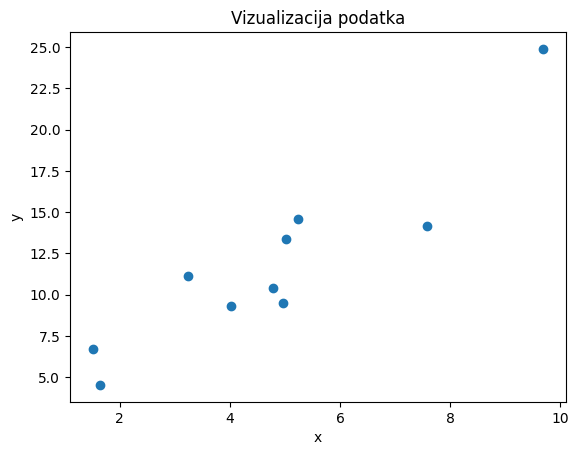

In [3]:
N = 10
X = np.random.uniform(0, 10, size=N)
np.sort(X)

y = 2 * X + 1 + 2 * np.random.randn(X.shape[0]) 

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vizualizacija podatka')
plt.show()

Već golim okom možemo vidjeti da su oznake `y` linearno zavisne od podatku `x`, a i pogledom na stvarnu distribuciju značajki znamo da stvarno i jest riječ o pravcu. Želimo sada naučiti model linearne regresije nad danim podatcima. Znamo da je to model oblika: 
$$ h(x) = w_0 + w_1x $$
Postavlja se pitanje kako pronaći optimalne parametre $w_0$ i $w_1$. Može se pokazati, da optimalne parametre možemo dobiti analitčki, sljedećom formulom:
$$  w_0 = \overline{y} - w_1 \overline{x} $$
$$  w_1 = \frac{\sum_{i}^{n} x^{(i)}y^{(i)} - N\overline{x}\overline{y}}{\sum_{i}^{N}(x^{(i)})^2 - N \overline{x}^2}$$

Izračunajmo ih!

In [4]:
x_bar = np.mean(X)
y_bar = np.mean(y)

sum_x_y = np.sum(X * y)
sum_x_x = np.sum(X * X)

w_1 = (sum_x_y - N * x_bar * y_bar) / (sum_x_x - N * x_bar * x_bar)
w_0 = y_bar - w_1 * x_bar

print(f'Parametar w_0 je {w_0}, a parametar w_1 je {w_1}')

Parametar w_0 je 2.0539070872656513, a parametar w_1 je 2.0531189060849453


Uvjerimo se u točnost ove procjene. Prvo ćemo izračunati pogrešku, a zatim ćemo regresijski pravac i nacrtati.

In [5]:
model = lambda x: w_0 + w_1 * x  # Ovo radi i za jedan primjer, ali i za ndarray primjera. Zašto?

error = np.mean((y - model(X))**2)
print(f'Pogreška modela je: {error}')

Pogreška modela je: 4.470669423009003


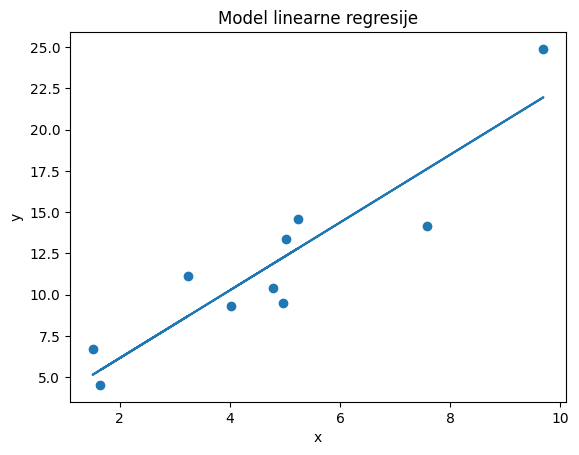

In [6]:
plt.scatter(X, y)
plt.plot(X, model(X))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model linearne regresije')
plt.show()

Uvjerili smo se da optimizacijski postupak radi. No ovo je postupak za podatke koji se sastoje od samo jedne značajke, u praksi želimo koristit više značajki, zato što na oznake često utječe više faktora. Primjerice na cijenu stana utječu i kvadratura i godina izgradnje. Generalizacija optimizacijskog postupka, na više značajki zove se **metoda najmanjih kvadrata**. Sada polazimo od matrice dizajna $\boldsymbol{X}$ proširene *dummy* značajkom (ta je značajka fiksna za sve podatke, uvijek iznosi $1$ te služi za modeliranje težine $w_0$).

$$
 \boldsymbol{X} = \begin{bmatrix} 
    1 & x^{(1)}_{1} & x^{(1)}_{2} & \dots & x^{(1)}_{n}\\
    1 & x^{(2)}_{1} & x^{(2)}_{2} & \dots & x^{(2)}_{n}\\
    \vdots &\vdots & \vdots & \ddots &  \vdots \\
    1 & x^{(N)}_{1} & x^{(N)}_{2} & \dots & x^{(N)}_{n} 
    \end{bmatrix}_{N \times (n + 1)}
$$

Također imamo i pripadni vektor oznaka:
$$
 \boldsymbol{y} = \begin{bmatrix}
     y^{(1)} \\ 
     y^{(2)} \\
     \vdots \\ 
     y^{(N)}
 \end{bmatrix}_{N \times 1}
$$

U idealnom slučaju želimo pronaći one težine $\boldsymbol{w}$ za koje vrijedi

$$
\boldsymbol{X} \boldsymbol{w} = \boldsymbol{y}
$$

Kada bi ovo vrijedilo, težine bi jednostavno izračunali na sljedeći način

$$
 \boldsymbol{w} = \boldsymbol{X}^{-1} \boldsymbol{y}
$$

Nažalost, moramo koristiti inverz matrice. Inverz postoji samo za neke simetrične matrice, a mi bi smo idealno htjeli imati više podataka od značajki. Iz tog razloga posežemo za pseudoinverzom matrice $\boldsymbol{X}^+$, koji je generalizacija koncepta inverza za sve matrice.

Vrijedi sljedeće
$$
argmin_w\Vert \boldsymbol{y} - \boldsymbol{X} \boldsymbol{w} \Vert = \boldsymbol{X}^+ \boldsymbol{y}
$$
Pošto je riječ o eukldiskoj normi, vektor težina $\boldsymbol{w}$ su upravo optimalni parametri koji minimiziraju kvadratno odstupanje.

Pseudoinverz je dan s:

$$
\boldsymbol{X}^+ = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T
$$

Pogledajmo primjer:

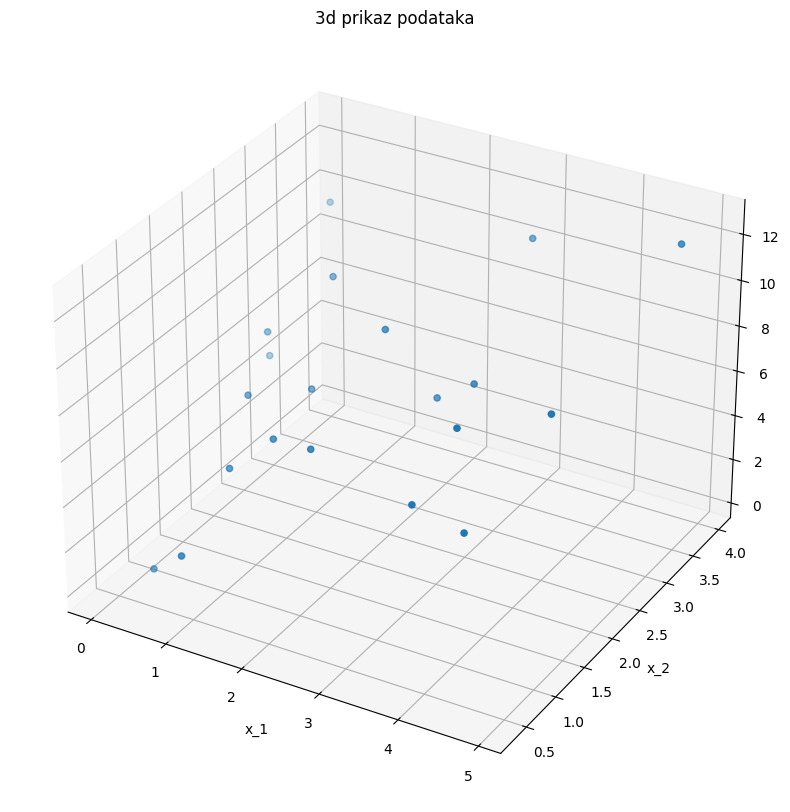

In [7]:
N = 20
x_1 = np.random.uniform(0,5,N)
x_2 = np.random.uniform(0,5,N)

y = x_1 + 2* x_2 + 1 + np.random.normal(0, 1, N)

# plotting

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(
  x_1,
  x_2,
  y
)

plt.title('3d prikaz podataka')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

plt.show()

In [8]:
# matrica dizajna

X = np.c_[np.ones_like(x_1), x_1, x_2]
# X = np.concatenate([x_1[: , np.newaxis], x_2[: , np.newaxis]], axis=1)

pseudo_inverse = np.linalg.inv(X.T @ X) @ X.T 

w = pseudo_inverse @ y

w





array([0.87647438, 1.02332777, 2.00970736])

Pogreška je 1.3243093652676468


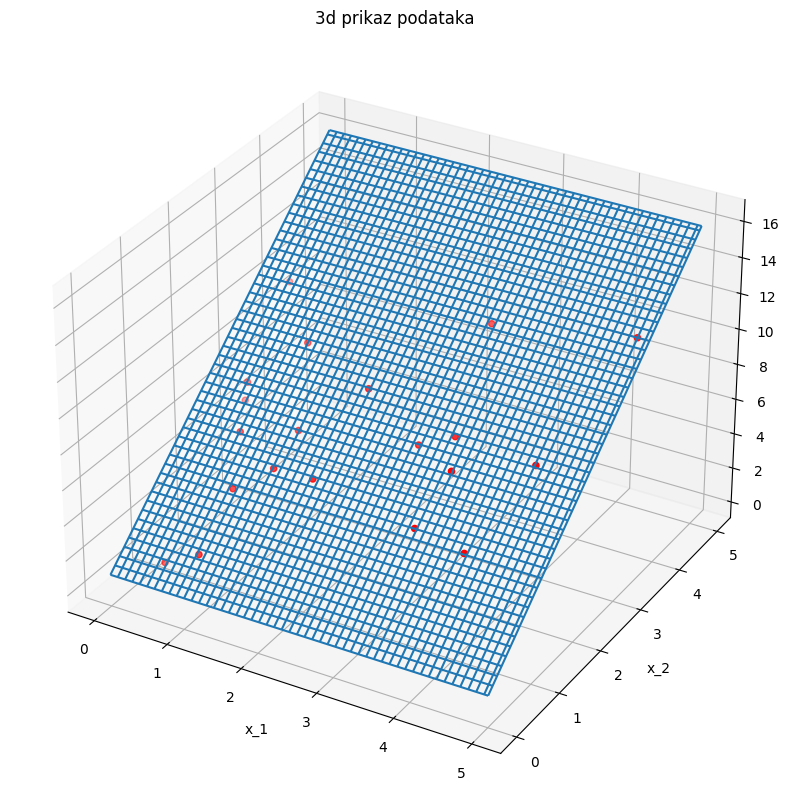

In [9]:
model_multi = lambda x: w[0] + w[1] * x[:,0] + w[2] * x[:,1]

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')



err = np.mean((y - model_multi(X[:,1:]))**2)

print(f'Pogreška je {err}')

plt.title('3d prikaz podataka')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

x_ls = np.linspace(0,5,100)
y_ls = np.linspace(0,5,100)

X_ls, Y_ls = np.meshgrid(x_ls, y_ls)
z = model_multi(np.c_[x_ls, y_ls])

ax.plot_wireframe(X_ls, Y_ls, z[:, np.newaxis], )

ax.scatter(
  x_1,
  x_2,
  y,
  c='r'
)
plt.show()




Pogledajmo još kako bi model linearne regresije implementirali pomoću biblioteke `sklearn`.

In [10]:
model = LinearRegression()
model.fit(X,y)  # metoda fit trenira model

y_pred = model.predict(X)  # metodom predict pridjeljujemo oznaku neoznačenom primjeru

print(model.coef_)  # uvjerite se da su koeficjenti jednaki onima koje smo mi izračunali

[0.         1.02332777 2.00970736]


Izvrsno, pokazali smo da linearna regresija izvrsno radi za linearne probleme. Nažalost većina problema u praksi nije linearna. Postavlja se pitanje kako se s tim problemima nositi? Odgovor je jednostavan, ali vrlo kreativan. Umjesto da koristimo nelinearan model koristiti ćemo nelinearne podatke. Ovo možemo jednostavno ilustrirati primjerom. Odaberimo funkciju preslikavanja $\phi : \mathbb{R}^2 \to \mathbb{R}^6$ s pravilom pridruživanja:
$$
\phi(x_1, x_2) = (1, x_1, x_2, x_1x_2, x_1^2, x_2^2)
$$
Ovo se službeno zove polinomijalno preslikavnje stupnja dva s interkacijskom značajkom. Efektivno smo povećali broj značajki podatka u nadi da će oznaka i neke značajke biti linearne. To je upravo ono što smo htjeli, sada možemo modelirati nelinarnu zavisnost značajke i oznake pomoću modela *linearnog u parametrima*.

Postavlja se pitanje što se mijenja u optimizacijskom postupku? Pa ništa značajno, jedino ćemo sada retke matrice dizajna preslikati pomoću funkcije $\phi$ i tu novu matricu označavati ćemo s $\boldsymbol{\Phi}$. Ostatak optimizacijskog postupka je isti. 

U pravilu ćemo koristit polinomijalna preslikavanja. Pogledajmo:

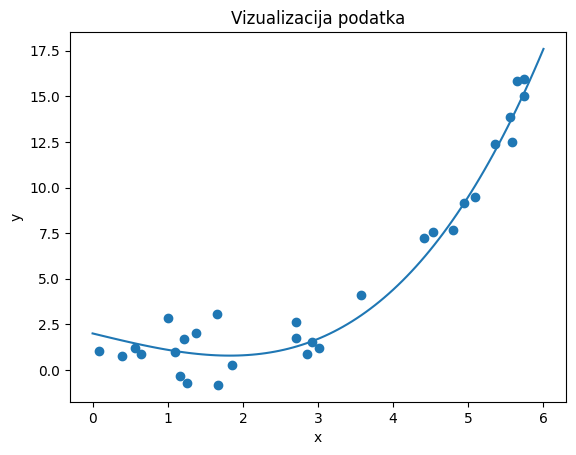

In [11]:
N = 30
X = np.random.uniform(0, 6, N)
y = 0.1*X**3 - X + 2 + np.random.normal(0, 1, N)

plt.scatter(X, y)
x_ls = np.linspace(0,6,100)
plt.plot(
    x_ls,
    0.1*x_ls**3 - x_ls + 2
)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vizualizacija podatka')
plt.show()

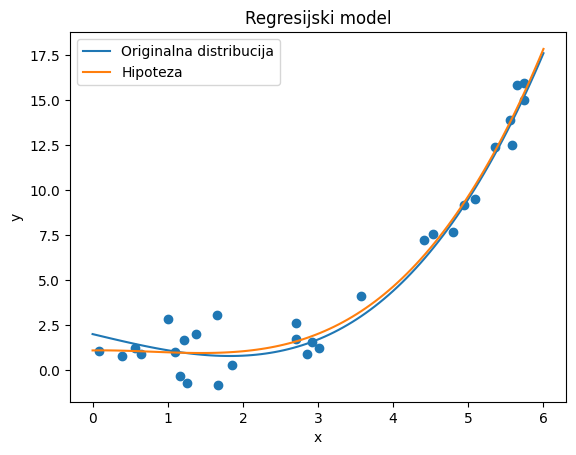

In [12]:

poly = PolynomialFeatures(3)  # uključuje dummy značajku
phi = poly.fit_transform(X[:, np.newaxis])

model = LinearRegression()
model.fit(phi, y)

plt.scatter(X, y)

x_ls = np.linspace(0,6,100)
plt.plot(
    x_ls,
    0.1*x_ls**3 - x_ls + 2,
    label='Originalna distribucija'
)

y_predict = model.predict(poly.transform(x_ls[:, np.newaxis]))

plt.plot(x_ls, 
         y_predict,
         label='Hipoteza')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresijski model')
plt.legend()
plt.show()




Vidimo da naš model jako dobro radi. Pokažimo primjer dvodimenzionalne "nelinearne" regresije

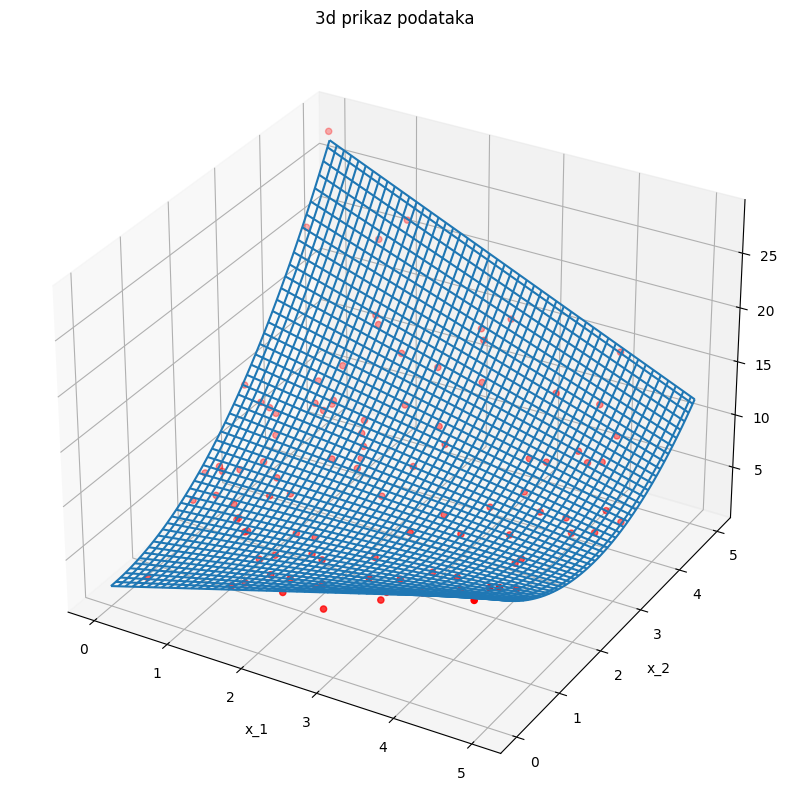

In [13]:
N = 100
X = np.random.uniform(0, 5, size=(N, 2))

y = X[:, 1]**2 - X[:,0] * X[:, 1] + 2*X[:, 0] + 2 + np.random.normal(0,1,size=N)


# plotting

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(
  X[:,0],
  X[:,1],
  y,
  color='red'
)

x_mesh, y_mesh = np.meshgrid(
  np.linspace(0,5,100),
  np.linspace(0,5,100)
)

ax.plot_wireframe(
  x_mesh,
  y_mesh,
  y_mesh ** 2 - x_mesh * y_mesh + 2* x_mesh + 2
)

plt.title('3d prikaz podataka')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

plt.show()

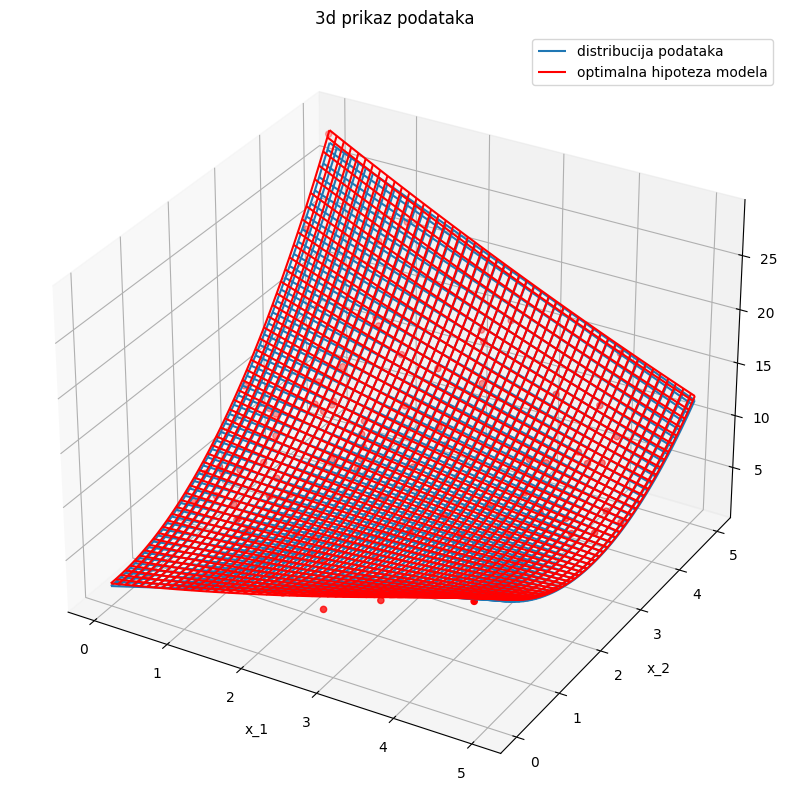

In [14]:
poly = PolynomialFeatures(2)

phi = poly.fit_transform(X)

model = LinearRegression()

model.fit(phi, y)

# plotting

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(
  X[:,0],
  X[:,1],
  y,
  color='red'
)

x_mesh, y_mesh = np.meshgrid(
  np.linspace(0,5,100),
  np.linspace(0,5,100)
)

ax.plot_wireframe(
  x_mesh,
  y_mesh,
  y_mesh ** 2 - x_mesh * y_mesh + 2* x_mesh + 2,
  label='distribucija podataka'
)


x_mesh_f = x_mesh.reshape(-1)  # f je kratica za flattened
y_mesh_f = y_mesh.reshape(-1)  # ovakav oblik je potreban za izračunavanje polinomijalne transformacije


transformed_mesh = poly.transform(
  np.column_stack((x_mesh_f, y_mesh_f))  # spojimo dva vektora kao stupce matrice
)

z_pred =  model.predict(transformed_mesh).reshape(100,100)  # vratimo nazad u 2d oblik
ax.plot_wireframe(
  x_mesh,
  y_mesh,
  z_pred,
  color='red',
  label='optimalna hipoteza modela'
)

plt.title('3d prikaz podataka')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('z')

plt.legend()
plt.show()


Podsjetimo se ponovno što je složenost odnosno kapacitet modela. Naime što je model (formalno hipoteze modela) nelinearniji, to je model složeniji. Na složenost modela utječu hiperparametri. Kod linearne regresije s polinomijalnim preslikavanjem je upravo stupanj preslikavnja hiperparametar koji određuje složenost modela. Pogledajmo to na sljedećem primjeru

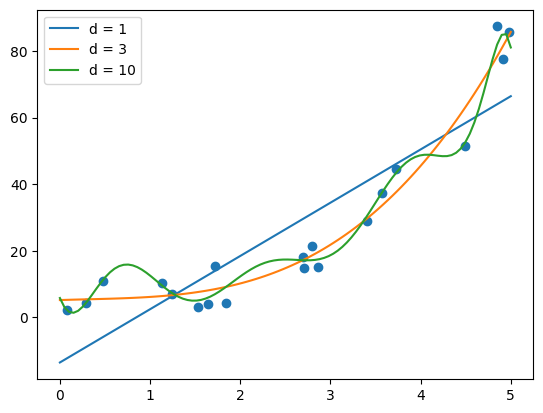

In [15]:
# Fiksirane vrijednosti su podatci na kojima se prenaučenost lijepo vidi
# One su genereirane pomoću gore zakomentiranih naredbi


N = 20
#X = np.random.uniform(0, 5, size=N)
X = np.array([1.72134938, 1.84573194, 2.69031406, 3.40066954, 2.70540896,
       2.86224583, 3.56638621, 1.53404786, 1.24143639, 4.91728411,
       3.73017151, 4.49336751, 2.79952706, 1.64505719, 1.13028602,
       0.28606733, 0.47269838, 4.8450141 , 4.98465841, 0.07423299])

#y = X**3 - 2*X**2 + 1 + np.random.uniform(0, 20, N)
y = np.array([15.35681429,  4.4877416 , 18.19197145, 29.07561205, 14.90169572,
       15.00676923, 37.37302852,  3.13631112,  6.90698628, 77.63890018,
       44.52874016, 51.42240767, 21.47882907,  3.98923048, 10.29659268,
        4.36804156, 10.95753419, 87.35800522, 85.57268145,  2.25347392])

# model 1
poly_1 = PolynomialFeatures(1)
phi_1 = poly_1.fit_transform(X.reshape(-1,1))

m_1 = LinearRegression()
m_1.fit(phi_1,y)


# model 2 
poly_2 = PolynomialFeatures(3)
phi_2 = poly_2.fit_transform(X.reshape(-1,1))

m_2 = LinearRegression()
m_2.fit(phi_2, y)

# model 3 
poly_3 = PolynomialFeatures(10)
phi_3 = poly_3.fit_transform(X.reshape(-1,1))

m_3 = LinearRegression()
m_3.fit(phi_3, y)


# plotting

x = np.linspace(0, 5, 100)
plt.plot(
  x,
  m_1.predict(
    poly_1.transform(x.reshape(-1,1))
  ),
  label='d = 1'
)

plt.plot(
  x,
  m_2.predict(
    poly_2.transform(x.reshape(-1,1))
  ),
  label='d = 3'
)

plt.plot(
  x,
  m_3.predict(
    poly_3.transform(x.reshape(-1,1))
  ),
  label='d = 10'
)

plt.scatter(
  X,
  y
)

plt.legend()
plt.show()




Vidimo da je linearan model podkapacitiran. Jednostavno nije dovoljno složen da modelira razdiobu. S druge pak strane vidimo da se model koji radi s podatcima transformiranim polinomijalnim preslikavanjem stupnja 10 prilagodio šumu. To jest zbog svog kapaciteta, je uz distribuciju podataka naučio i šum. Po očekivanju, model koji može egzaktno replicirati originalnu distribuciju, ali ne i složeniju najbolje odgovara podatcima. Kako ne bi modele procjenivali odokativno, za odabir optimalne složenosti koristimo koncept *unakrsne provjere*. Naime umjesto da model učimo nad svim podatcima, mi ćemo podatke podijeliti na dva skupa. Skup za učenje na kojem ćemo trenirati model, te na skup za provjeru na kojem ćemo model testirati. Pošto podatke za testiranje model vidi tek na evaluaciji neće se moći prilagoditi šumu na tim podatcima, te će prenaučen model (koji ima malu pogrešku na skupu za učenje) imati veću pogrešku od modela koji dobro *generalizira*. Potkrijepimo to sljedećim ekspirementom. Generirat ćemo testni skup podataka iz iste distribucije, te ćemo izmjeriti greške modela.

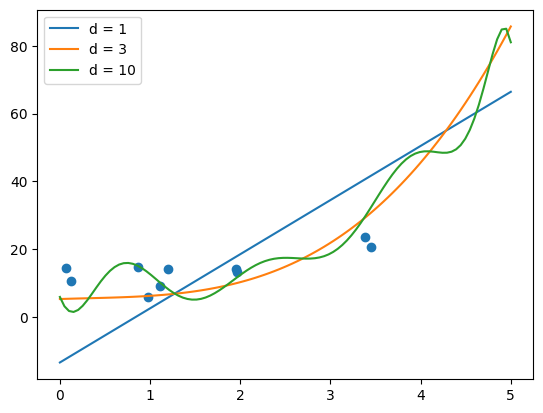

Greška za d = 1 je 227.69714199667246
Greška za d = 3 je 40.95530552816922
Greška za d = 10 je 49.40580577677351


In [16]:
# Fiksirane vrijednosti su podatci na kojima se prenaučenost lijepo vidi
# One su genereirane pomoću gore zakomentiranih naredbi


N = 10
X_test = np.random.uniform(0, 5, size=N)


y_test = X_test**3 - 2*X_test**2 + 1 + np.random.uniform(0, 20, N)


y_test_predict_1 = m_1.predict(
  poly_1.transform(X_test.reshape(-1,1))
) 
err_tst_1 = np.mean((y_test - y_test_predict_1) ** 2)

y_test_predict_2 = m_2.predict(
  poly_2.transform(X_test.reshape(-1,1))
) 
err_tst_2 = np.mean((y_test - y_test_predict_2) ** 2)

y_test_predict_3 = m_3.predict(
  poly_3.transform(X_test.reshape(-1,1))
) 
err_tst_3 = np.mean((y_test - y_test_predict_3) ** 2)

# plotting

x = np.linspace(0, 5, 100)
plt.plot(
  x,
  m_1.predict(
    poly_1.transform(x.reshape(-1,1))
  ),
  label='d = 1'
)

plt.plot(
  x,
  m_2.predict(
    poly_2.transform(x.reshape(-1,1))
  ),
  label='d = 3'
)

plt.plot(
  x,
  m_3.predict(
    poly_3.transform(x.reshape(-1,1))
  ),
  label='d = 10'
)

plt.scatter(
  X_test,
  y_test
)

plt.legend()
plt.show()


print(f'Greška za d = 1 je {err_tst_1}')
print(f'Greška za d = 3 je {err_tst_2}')
print(f'Greška za d = 10 je {err_tst_3}')




Postavlja se pitanje kako odabrati optimalnu složenost modela? Pretpostavimo na trenutak da složenost modela linearno prati hiperparametar. U našem slučaju hiperparametar je stupanj polinomijalnog preslikavnja $d$. To konkretno znači da ako postoji model $m_{d_i}$ i model $m_{d_j}$ takvi da je $d_i > d_j$ onda je i kapacitet modela $m_{d_i}$ veći od kapaciteta modela $m_{d_j}$. Jednostavno možemo postepno povećavati $d$, tako dugo dok greška na skupu za provjeru pada. Neka je $d_i$ prvi odabir hiperparametra za koji greška počne rasti, jednostavno odaberemo parametar $d_i - 1$. Prije nego što pogledamo primjer, odabir hiperparametra u pravilu ovisi o skupu za provjeru, tako da najčešće koristimo tri skupa. Skup za treniranje, validaciju i provjeru. Na skupu za validaciju biramo hiperparametre, dok na skupu za testiranje pogrešku modela. U ovom školskom okruženju preskočit ćemo skup za validaciju.  

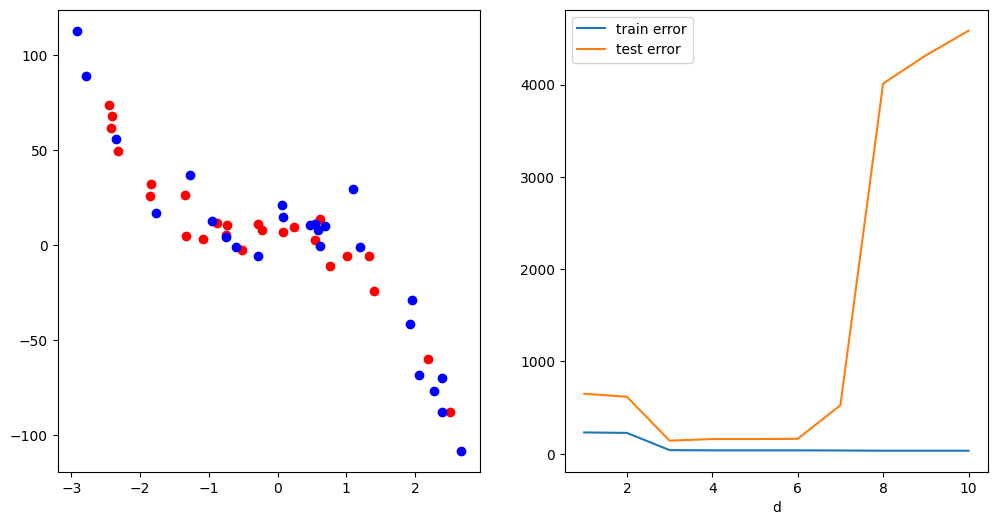

2


In [52]:
from sklearn.model_selection import train_test_split

N = 50
X = np.random.uniform(-3, 3, size=N)
Y = 5 + X - 2*X**2 - 5*X**3 + 10 * np.random.normal(0, 1, size=N)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

ds = [i for i in range(1,11)]

train_errs = []
test_errs = []

for d in ds:
    poly = PolynomialFeatures(d)
    X = poly.fit_transform(x_train.reshape(-1,1))
    X_test = poly.fit_transform(x_test.reshape(-1,1))


    model = LinearRegression()
    model.fit(X, y_train)

    y_train_predict = model.predict(X)
    y_test_predict = model.predict(X_test)
    
    train_err = np.mean((y_train_predict - y_train)**2)
    test_err = np.mean((y_test_predict - y_test)**2)

    train_errs.append(train_err)
    test_errs.append(test_err) 

fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='red')
plt.scatter(x_test, y_test, c='blue')

plt.subplot(1,2,2)
plt.plot(ds, train_errs, label='train error')
plt.plot(ds, test_errs, label='test error')

plt.xlabel('d')

plt.legend()
plt.show()


print(np.argmin(test_errs))



Jedan od načina borbe protiv prenaučenosti je i *regularizacija*. Prije nego što ga objasnimo obratimo pažnju na sljedeću propoziciju. Za neki model linearne regresije koji koristi polinomijalnu funkciju preslikavanja. Što su težine modela veće to je hipoteza nelinearnija. Primjerice, kvadratna funkcija s parametrom $a = 2$ je nelinearnija od one s parametrom $a = 0.1$. Regularizacija je postupak kažnjavanja modela na temelju magnitude težina. To jest u funkciju pogreške ugradit ćemo kaznu temeljenu na normi vektora težina tog modela. Što smo time dobili? Dobili smo mogućnost modelu dopustiti preslikavanja većeg stupnja, uz svojervrsnu garanaciju da se model neće prenaučiti. Naime ako bi model krenuo koristiti nelinearnost kako bi naučio šum, očekujemo da će se kvadratno odstupanje samnjivati u mjeri manjoj od rasta kazne za povećanje magnitude. Pogledajmo formalnu definiciju regularizirane funkcije pogreške:
$$
\mathcal{E}_R (\boldsymbol{w} | \mathcal{D}) = \mathcal{E}(\boldsymbol{w} | \mathcal{D}) + \lambda \Omega(\boldsymbol{w}) 
$$

Vidimo da je regularizirana funkcija pogreške linearna kombinacija funkcije pogreške i *{regularizacijskog izraza*, a *regularizacijskim faktorom* $\lambda$ ugađamo omjere. Pošto $\lambda$ direktno utječe na složenost modela, riječ je o hiperparametru. Nameće se pitanje, kako odabrati regularizacijski izraz? Već smo prije natuknuli da želimo da izraz mjeri magnitudu težina. Kao dva (glavna) kandidata nameću se *manhattan udaljenost*($L^1$ norma) i *euklidska udaljenost*($L^2$ norma):

$$
L^1(\boldsymbol{w}) = \sum_{i = 1}^n | w_i |  = \Vert \boldsymbol{w} \Vert_{1}
$$
$$
L^2(\boldsymbol{w}) = \sqrt{\sum_{i = 1}^n w_i^2} = \Vert \boldsymbol{w} \Vert_2
$$

Odabirom $L^1$ norme govorimo o *lasso* regularizaciji, a odabirom $L^2$ norme o hrbatnoj regularizaciji (engl. *Ridge regression*). Hrbatna regularizacija ima rješenje u zatvorenoj formi dok *lasso* regularizacija nema. Ona se optimizira iterativno, te je njena bitna karakteristika, da, u prosjeku, više parametara "pritegne" na nulu od hrbatne. 
\\ \\
Također trebamo izuzeti težinu $w_0$ iz regularizacije iz dva razloga. Prvi je da ona uopće ne doprinosi složenosti, a drugi je da ona omugućava pomicanje naše hipoteze od ishodišta što nam je vrlo bitno svojstvo.

neregularizirani model -> train error: 24.508124164381023, test error: 635517.8088585928
hrbatni model -> train error: 60.90771149571451, test error: 5843.934027844089
lasso model -> train error: 68.87189903824529, test error: 154.825867950131
neregularizirani model -> parametri [  0.         -18.60268452 -29.74247193  20.34302489  -1.10319135
  -1.21426935   0.16658606]
hrbatni model -> parametri [ 0.          0.27440742 -1.8066471   1.4317397  -0.42831334 -0.12955508
  0.02368551]
lasso model -> parametri [ 0.          0.76108134  0.         -0.27959512 -0.26259938 -0.02631859
  0.00692469]


/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+02, tolerance: 3.973e+00
  model = cd_fast.enet_coordinate_descent(


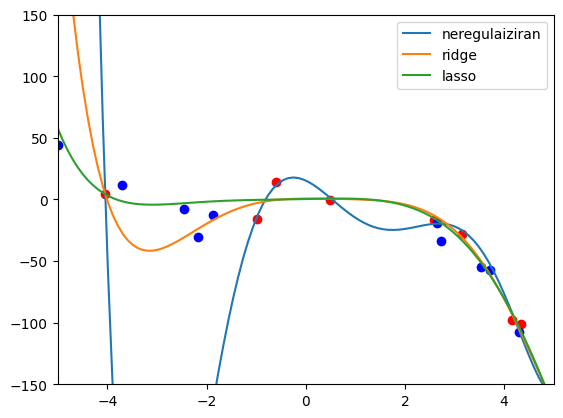

In [95]:
from sklearn.linear_model import Ridge, Lasso

N = 20
X = np.random.uniform(-5, 5, size=N)

Y = -X ** 3 - 3 * X ** 2 + 5 * X + 10 + 10* np.random.normal(0, 1, size=N)

x_train_original, x_test_original, y_train, y_test = train_test_split(X, Y, train_size=0.5)

d = 6

poly = PolynomialFeatures(d)

x_train = poly.fit_transform(x_train_original.reshape(-1, 1))
x_test = poly.fit_transform(x_test_original.reshape(-1, 1))


m_1 = LinearRegression()
m_1.fit(x_train,y_train)

y_train_pred_1 = m_1.predict(x_train)
y_test_pred_1 = m_1.predict(x_test)

err_train_1 = np.mean((y_train_pred_1 - y_train) ** 2)
err_test_1 = np.mean((y_test_pred_1 - y_test) ** 2)


m_2 = Ridge(5.0)
m_2.fit(x_train, y_train)
        
y_train_pred_2 = m_2.predict(x_train)
y_test_pred_2 = m_2.predict(x_test)

err_train_2 = np.mean((y_train_pred_2 - y_train) ** 2)
err_test_2 = np.mean((y_test_pred_2 - y_test) ** 2)


m_3 = Lasso()
m_3.fit(x_train, y_train)

y_train_pred_3 = m_3.predict(x_train)
y_test_pred_3 = m_3.predict(x_test)

err_train_3 = np.mean((y_train_pred_3 - y_train) ** 2)
err_test_3 = np.mean((y_test_pred_3 - y_test) ** 2)

print(f'neregularizirani model -> train error: {err_train_1}, test error: {err_test_1}')
print(f'hrbatni model -> train error: {err_train_2}, test error: {err_test_2}')
print(f'lasso model -> train error: {err_train_3}, test error: {err_test_3}')


print(f'neregularizirani model -> parametri {m_1.coef_}')
print(f'hrbatni model -> parametri {m_2.coef_}')
print(f'lasso model -> parametri {m_3.coef_}')
x_ls = np.linspace(-5, 5, 100).reshape(-1,1)
x_ls_transformed = poly.fit_transform(x_ls)


plt.plot(
  x_ls,
  m_1.predict(x_ls_transformed),
  label='neregulaiziran'
)

plt.plot(
  x_ls,
  m_2.predict(x_ls_transformed),
  label='ridge'
)

plt.plot(
  x_ls,
  m_3.predict(x_ls_transformed),
  label='lasso'
)

plt.scatter(x_train_original, y_train, c='red')
plt.scatter(x_test_original, y_test, c='blue')

plt.axis([-5,5,-150, 150])

plt.legend()
plt.show()